In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the necessary libraries

In [2]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras import layers
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,load_model
from keras.layers import Input, Dense, Add,Activation, AveragePooling2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, ZeroPadding2D
from keras.utils import to_categorical
from keras.initializers import glorot_uniform
from keras import regularizers
import scipy.misc
from sklearn.model_selection import train_test_split


In [3]:
root_directory="/content/drive/MyDrive/DATASETS/"
survival_words_directory="/content/drive/MyDrive/DATASETS/25_survival_words/"
alphabets_directory="/content/drive/MyDrive/DATASETS/ALPHABETS/"
numbers_directory="/content/drive/MyDrive/DATASETS/NUMBERS/"

In [4]:
k=0

Creating numpy arrays of elements an labelling array

In [5]:
def load_dataset(directory,k):
  images=[]
  labels=[]
  for idx,label in enumerate(uniq_labels):
    for file in os.listdir(directory + label):
      filepath = directory + label +"/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(k)
    k+=1
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels,k

In [ ]:
# uniq_labels=sorted(os.listdir(alphabets_directory))
# print(uniq_labels)

In [6]:
uniq_labels=sorted(os.listdir(numbers_directory))
X_numbers_directory,y_numbers_directory,k=load_dataset(numbers_directory,k)

In [ ]:
# /content/drive/MyDrive/DATASETS/NUMBERS

In [7]:
y_numbers_directory


array([0, 0, 0, ..., 9, 9, 9])

In [9]:
uniq_labels=sorted(os.listdir(alphabets_directory))
X_alphabets_directory,y_alphabets_directory,k=load_dataset(alphabets_directory,k)

In [10]:
y_alphabets_directory

array([35, 35, 35, ..., 59, 59, 59])

In [11]:
uniq_labels=sorted(os.listdir(survival_words_directory))
X_survival_words_directory,y_survival_words_directory,k=load_dataset(survival_words_directory,k)

In [12]:
y_survival_words_directory

array([60, 60, 60, ..., 84, 84, 84])

In [13]:
X=[]
y=[]

In [14]:
X=np.concatenate((X_numbers_directory,X_alphabets_directory))

In [15]:
X=np.concatenate((X,X_survival_words_directory))

In [16]:
y=np.concatenate((y_numbers_directory,y_alphabets_directory))

In [17]:
y=np.concatenate((y,y_survival_words_directory))

In [18]:
y

array([ 0,  0,  0, ..., 84, 84, 84])

In [19]:
# list(y.keys())
y = to_categorical(y)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X_train = X_train / 255.
X_test = X_test/ 255.

CNN Model

In [22]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation = 'relu', input_shape=(50,50,3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(y.shape[1], activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [23]:
y.shape

(18450, 85)

In [24]:
np.unique(y)

array([0., 1.], dtype=float32)

In [25]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

Fitting the Model

In [28]:
fit = model.fit(X_train, Y_train, batch_size=138, epochs=200)

Epoch 1/200
107/107 [==============================] - 1s 10ms/step - loss: 6.2208e-06 - accuracy: 1.0000
Epoch 2/200
107/107 [==============================] - 1s 9ms/step - loss: 4.9304e-06 - accuracy: 1.0000
Epoch 3/200
107/107 [==============================] - 1s 9ms/step - loss: 1.1669e-04 - accuracy: 1.0000
Epoch 4/200
107/107 [==============================] - 1s 9ms/step - loss: 5.9425e-05 - accuracy: 1.0000
Epoch 5/200
107/107 [==============================] - 1s 9ms/step - loss: 4.3093e-06 - accuracy: 1.0000
Epoch 6/200
107/107 [==============================] - 1s 10ms/step - loss: 7.3984e-06 - accuracy: 1.0000
Epoch 7/200
107/107 [==============================] - 1s 9ms/step - loss: 3.5451e-06 - accuracy: 1.0000
Epoch 8/200
107/107 [==============================] - 1s 9ms/step - loss: 4.7292e-06 - accuracy: 1.0000
Epoch 9/200
107/107 [==============================] - 1s 9ms/step - loss: 2.4825e-06 - accuracy: 1.0000
Epoch 10/200
107/107 [==============================]

In [29]:
y_pred = model.predict(X_test)

116/116 [==============================] - 0s 3ms/step


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred.round())*100

99.97289972899729

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_pred.round(), Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        59
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        57
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
accuracy = model.evaluate(X_test,Y_test,batch_size=138)
print("Accuracy: ",accuracy[1]*100)

27/27 [==============================] - 0s 7ms/step - loss: 5.0983e-04 - accuracy: 0.9997
Accuracy:  99.97289776802063


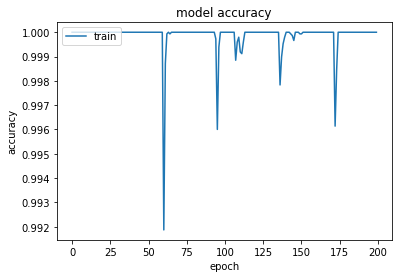

In [39]:
plt.plot(fit.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

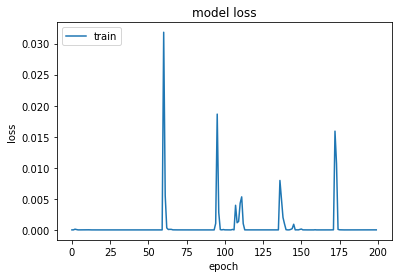

In [40]:
plt.plot(fit.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [34]:
# model.save_weights('/content/drive/MyDrive/Freelance/NomanRafique/')
model.save('my_third_model.h5') 


In [36]:
model.save('/content/drive/MyDrive/my_third_model.h5') 